In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)

In [79]:
theta_vector = np.array([-25,1,2])

np.random.seed(10)
x1_inputs = np.random.uniform(-10, 10, size=100)
np.random.seed(100)
x2_inputs = np.random.uniform(-10, 10, size=100)


In [80]:
row_list = []
labels = []

for x1,x2 in zip(x1_inputs,x2_inputs):
    x_i_vector = np.array([1,x1,x2])
    row_list.append(x_i_vector)
    
    hypothesis_prediction = np.dot(theta_vector, x_i_vector)
    if hypothesis_prediction >= 25:
        labels.append(1)
    else:
        labels.append(0)

In [81]:
design_matrix = np.array(row_list)
data = pd.DataFrame(row_list,columns = ['intercept','x1','x2'])
data['label'] = labels
np.random.seed(123)
test_ids = np.random.choice(np.arange(0, data.shape[0]), size=int(.20*data.shape[0]), replace=False)
test_data = data[data.index.isin(test_ids)]
training_data = data[~data.index.isin(test_ids)]

In [82]:
test_data['type'] = 'test'
training_data['type'] = 'train'

full_data = pd.concat([test_data,training_data])

cols_to_keeps = ['x1','x2','label']


<ipython-input-82-6e923fa6df3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['type'] = 'test'
<ipython-input-82-6e923fa6df3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['type'] = 'train'


In [90]:
data['label'] = ((data['x1'] + 2*data['x2']) >= 0).astype(int)

test_data = data.loc[test_ids].copy()
training_data = data.drop(index=test_ids).copy()

In [91]:
feature_cols = ['x1', 'x2']

X_train = training_data[feature_cols].values
y_train = training_data['label'].astype(int).values
X_test  = test_data[feature_cols].values
y_test  = test_data['label'].astype(int).values

In [92]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])


In [93]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [94]:
lr_pred  = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:, 1]

In [95]:
print("Accuracy:", round(accuracy_score(y_test, lr_pred), 4))
try:
    print("ROC AUC:", round(roc_auc_score(y_test, lr_proba), 4))
except ValueError:
    print("ROC AUC: n/a (only one class present in y_test)")
print("Confusion matrix:\n", confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred, digits=3))

Accuracy: 1.0
ROC AUC: 1.0
Confusion matrix:
 [[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         7

    accuracy                          1.000        20
   macro avg      1.000     1.000     1.000        20
weighted avg      1.000     1.000     1.000        20



In [96]:
knn_pred  = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]

In [97]:
print("\n=== KNN (k=3, distance weights) ===")
print("Accuracy:", round(accuracy_score(y_test, knn_pred), 4))
try:
    print("ROC AUC:", round(roc_auc_score(y_test, knn_proba), 4))
except ValueError:
    print("ROC AUC: n/a (only one class present in y_test)")
print("Confusion matrix:\n", confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred, digits=3))



=== KNN (k=3, distance weights) ===
Accuracy: 1.0
ROC AUC: 1.0
Confusion matrix:
 [[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         7

    accuracy                          1.000        20
   macro avg      1.000     1.000     1.000        20
weighted avg      1.000     1.000     1.000        20



In [98]:
print("y_test class balance:", np.unique(y_test, return_counts=True))
print("LogReg perfect? ", np.array_equal(logreg.predict(X_test), y_test))
print("KNN perfect?    ", np.array_equal(knn.predict(X_test), y_test))
print("Confusion (LogReg):\n", confusion_matrix(y_test, logreg.predict(X_test)))
print("Confusion (KNN):\n", confusion_matrix(y_test, knn.predict(X_test)))

y_test class balance: (array([0, 1]), array([13,  7]))
LogReg perfect?  True
KNN perfect?     True
Confusion (LogReg):
 [[13  0]
 [ 0  7]]
Confusion (KNN):
 [[13  0]
 [ 0  7]]


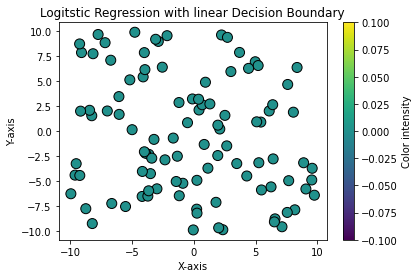

In [99]:
# Create the scatter plot
plt.scatter(x1_inputs, x2_inputs, c=labels, cmap='viridis', s=100, edgecolor='k')

# Add a color bar
plt.colorbar(label='Color intensity')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Logitstic Regression with linear Decision Boundary')

# Show the plot
plt.show()

